<a href="https://colab.research.google.com/github/EON-LEE/Course-DeepLearning/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 강의 9주차

## Simple Linear Regressing with Neural Networks

### 데이터셋 만들기

In [1]:
import numpy as np

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


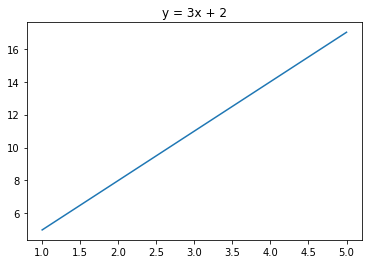

In [2]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

### 모델구조

In [3]:
import tensorflow as tf

In [4]:
# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

In [5]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

In [6]:
import tensorflow as tf

In [7]:
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4) 인 경우 input_shape 지정 
    tf.keras.layers.Dense(10, input_shape=[4]), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

### 선형회귀모형 생성

In [8]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])                    
])

In [9]:
# 모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


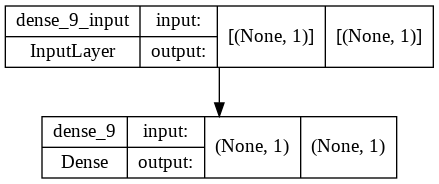

In [10]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [11]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

In [12]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])



In [13]:

# 훈련
history = model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 133.3827 - mae: 10.7817
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 77.8200 - mae: 8.2741
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 45.4402 - mae: 6.3597
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 26.5702 - mae: 4.8981
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 15.5731 - mae: 3.7822
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.1639 - mae: 2.9303
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 5.4284 - mae: 2.2797
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 3.2509 - mae: 1.7830
Epoch 9/100
1/1 [==============================] - 0s 28ms/step - loss: 1.9814 - mae: 1.4036
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 1.2410 - mae: 1.1139
Epoch 11/100
1/1 [==============================] - 0s 8ms/step 

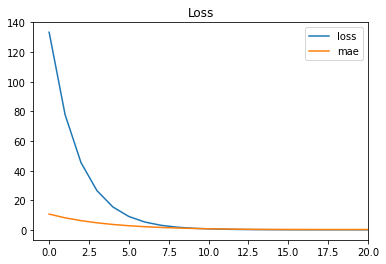

In [14]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

In [15]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 0s 289ms/step - loss: 0.1128 - mae: 0.2883


[0.11278615146875381, 0.28825607895851135]

In [16]:
# 예측
model.predict([10])

# 3 * 10 + 2 = 32

array([[33.393177]], dtype=float32)

## mnist classification with Neural Networks

### 데이터셋 만들기

In [17]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

In [18]:
# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [19]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


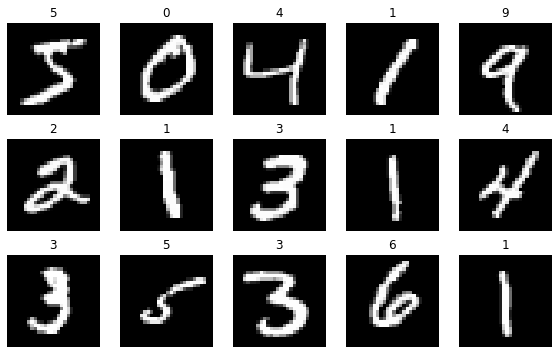

In [20]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### 데이터 전처리

In [21]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [22]:
# 픽셀 값의 최소/최대 값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대 값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [23]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

In [24]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

### Input 의 2가지 방법

In [25]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [26]:
print(f'변경전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


### 모델 설계

#### 출력 층이 1개 node 인 경우

In [27]:
# # 출력층 노드 = 1인 경우, sigmoid
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    # 노드=10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(1, activation='sigmoid'), 
])

In [28]:

# tf.keras.layers.Dense(1, activation='sigmoid')

# # 출력층 노드 = 2개 이상인 경우, softmax
# tf.keras.layers.Dense(10, activation='softmax')

In [29]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

#### 출력 층이 10개 node인 경우

In [30]:
# # 출력층 노드 = 1인 경우, sigmoid
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    # 노드=10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'), 
])

In [31]:
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# # y가 원 핫 벡터가 아닌경우
# # [5]
# model.compile(loss='sparse_categorical_crossentropy')

#### 옵티마이져

In [32]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
# model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#### 평가 지표

In [33]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=[acc])

### 훈련

In [34]:
# 훈련
model.fit(x_train, y_train, 
          epochs=10, 
          )

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2346 - sparse_categorical_accuracy: 0.9297
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0950 - sparse_categorical_accuracy: 0.9714
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0644 - sparse_categorical_accuracy: 0.9796
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0491 - sparse_categorical_accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0389 - sparse_categorical_accuracy: 0.9875
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0315 - sparse_categorical_accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0260 - sparse_categorical_accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0237 - sparse_categorical_accuracy: 0.9925
Epoch 9/10
1875/1875 [==========

### 테스트

In [35]:
# 검증
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0949 - sparse_categorical_accuracy: 0.9801
검증셋 정확도: 0.9800999760627747


### 예측

In [36]:
# 예측
predictions = model.predict(x_test)

In [37]:
# 예측 결과 출력
predictions[0]

array([6.6109500e-11, 4.5045180e-08, 1.5575512e-12, 2.6090829e-09,
       5.8862548e-10, 1.0383090e-12, 3.6692031e-11, 1.0000000e+00,
       4.2710337e-09, 5.3373032e-08], dtype=float32)

In [38]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

7


In [39]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


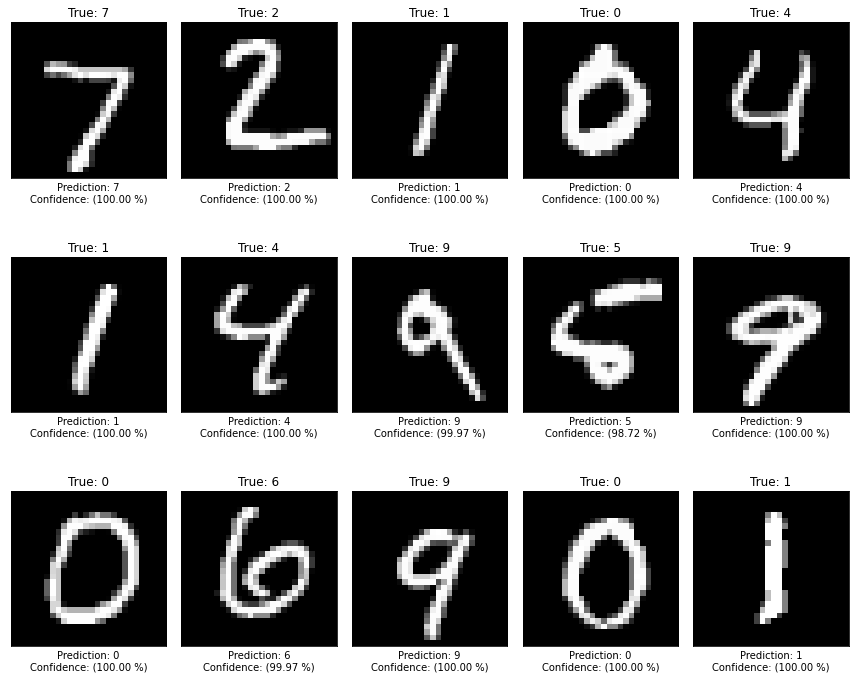

In [40]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence
    
# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]

    img, y_true, y_pred, confidence = get_one_result(i)

    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()

## Deep Learning Optimization Techniques

In [41]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max: 255
x_test = x_test / x_test.max() # max: 255

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


#### weight initialization

In [42]:

dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [43]:

# he normal 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

#### Regularization

In [44]:
# 기본 값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_20',
 'trainable': True,
 'units': 256,
 'use_bias': True}

In [45]:
# 클래스 인스턴스 적용, alpha 값 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


In [46]:
# 클래스 인스턴스 적용, alpha 값 변경
regularizer = tf.keras.regularizers.l2(l2=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L2', 'config': {'l2': 0.10000000149011612}}


### batch normalization

In [47]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 64)                50240     
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax'),
])
model_b.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

### Activation Functions

In [49]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2 로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [50]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 요약
model_c.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

### 비교

In [51]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2877 - accuracy: 0.9173 - val_loss: 0.1559 - val_accuracy: 0.9535
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1320 - accuracy: 0.9604 - val_loss: 0.1112 - val_accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0937 - accuracy: 0.9718 - val_loss: 0.0930 - val_accuracy: 0.9721
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0743 - accuracy: 0.9769 - val_loss: 0.0907 - val_accuracy: 0.9714
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0609 - accuracy: 0.9813 - val_loss: 0.0940 - val_accuracy: 0.9727
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9833 - val_loss: 0.0856 - val_accuracy: 0.9758
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0437 - accuracy: 0.9864 - val_loss: 0.0997 - val_accuracy:

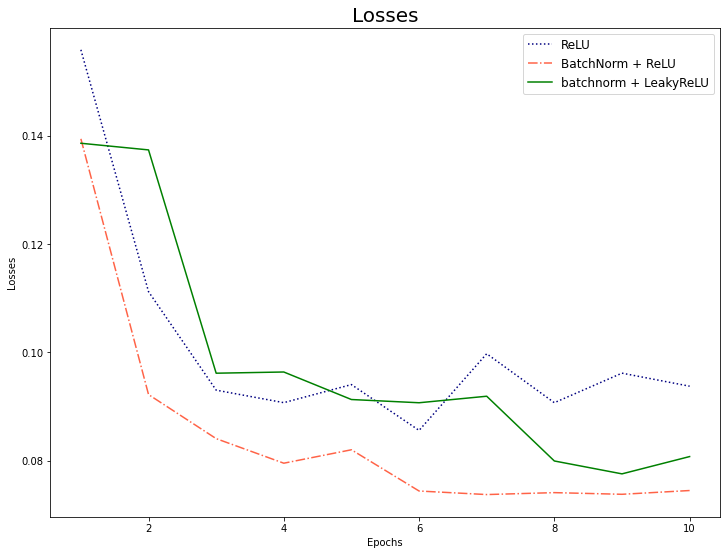

In [53]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU','batchnorm + LeakyReLU'], fontsize=12)
plt.show()

### Early Stopping

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), # 노드 10개로 생성
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
# EarlyStopping 콜백 생성
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [56]:
hist = model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=50, 
          callbacks=[earlystopping]
          )

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2263 - accuracy: 0.9331 - val_loss: 0.1112 - val_accuracy: 0.9652
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0923 - accuracy: 0.9714 - val_loss: 0.0850 - val_accuracy: 0.9730
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0653 - accuracy: 0.9794 - val_loss: 0.0909 - val_accuracy: 0.9745
Epoch 4/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0501 - accuracy: 0.9841 - val_loss: 0.0831 - val_accuracy: 0.9751
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.0857 - val_accuracy: 0.9743
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0330 - accuracy: 0.9891 - val_loss: 0.0777 - val_accuracy: 0.9786
Epoch 7/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0281 - accuracy: 0.9908 - val_loss: 0.0845 - val_accuracy:

In [57]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), # 노드 10개로 생성
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [58]:
hist2 = model2.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=50
          )

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2282 - accuracy: 0.9329 - val_loss: 0.1079 - val_accuracy: 0.9686
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0942 - accuracy: 0.9705 - val_loss: 0.1259 - val_accuracy: 0.9593
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0644 - accuracy: 0.9803 - val_loss: 0.0877 - val_accuracy: 0.9741
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0501 - accuracy: 0.9837 - val_loss: 0.0805 - val_accuracy: 0.9772
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0399 - accuracy: 0.9876 - val_loss: 0.0723 - val_accuracy: 0.9780
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0839 - val_accuracy: 0.9767
Epoch 7/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0267 - accuracy: 0.9912 - val_loss: 0.0846 - val_accuracy:

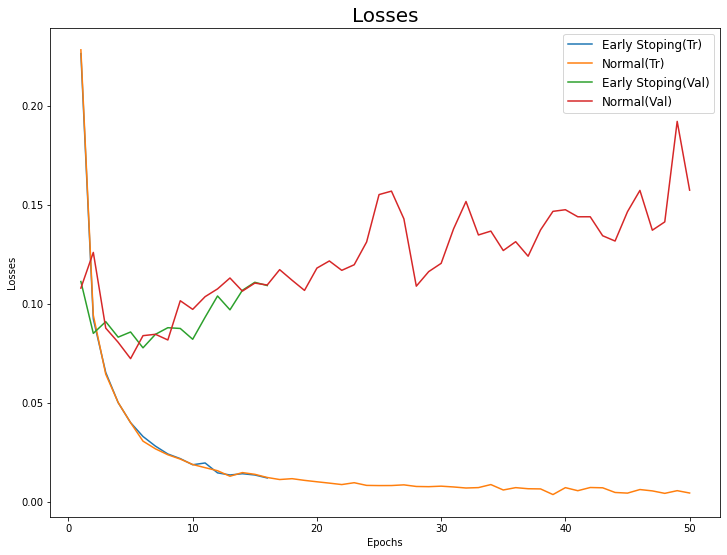

In [59]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, len(hist.history['accuracy'])+1), hist.history['loss'])
plt.plot(np.arange(1, len(hist2.history['accuracy'])+1), hist2.history['loss'])
plt.plot(np.arange(1, len(hist.history['accuracy'])+1), hist.history['val_loss'])
plt.plot(np.arange(1, len(hist2.history['accuracy'])+1), hist2.history['val_loss'])

plt.title('Losses', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['Early Stoping(Tr)', 'Normal(Tr)', 'Early Stoping(Val)', 'Normal(Val)'], fontsize=12)
plt.show()

### Learning Rate Scheduler

In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), # 노드 10개로 생성
])

In [61]:
def scheduler(epoch, lr):
    tf.print(f'learning_rate: {lr:.5f}')
    # 첫 5 에포크 동안 유지
    if epoch < 5:
        return lr
    else:
    # 학습률 감소 적용
        return lr * tf.math.exp(-0.1)

# 콜백 객체생성 및 scheduler 함수 적용
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [62]:
model.compile(tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 초기 학습률 확인(0.01)
print(round(model.optimizer.lr.numpy(), 5))

0.01


In [63]:
model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=10,
          # 학습률 스케줄러 적용
          callbacks=[lr_scheduler]
          )
# 최종 학습률 스케줄러 확인
round(model.optimizer.lr.numpy(), 5)

learning_rate: 0.01000
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6012 - accuracy: 0.8367 - val_loss: 0.2824 - val_accuracy: 0.9186 - lr: 0.0100
learning_rate: 0.01000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2625 - accuracy: 0.9252 - val_loss: 0.2173 - val_accuracy: 0.9362 - lr: 0.0100
learning_rate: 0.01000
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2042 - accuracy: 0.9412 - val_loss: 0.1830 - val_accuracy: 0.9466 - lr: 0.0100
learning_rate: 0.01000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1672 - accuracy: 0.9520 - val_loss: 0.1569 - val_accuracy: 0.9536 - lr: 0.0100
learning_rate: 0.01000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1421 - accuracy: 0.9591 - val_loss: 0.1440 - val_accuracy: 0.9576 - lr: 0.0100
learning_rate: 0.01000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0

0.00607